### This dataset has been taken from: https://github.com/CSSEGISandData/COVID-19

In [315]:
import pandas as pd
import os
from collections import Counter
from tqdm import tqdm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
cd /media/thedrowsywinger/2A24A59224A56195/Poralekha/github/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports

/media/thedrowsywinger/2A24A59224A56195/Poralekha/github/COVID-19/csse_covid_19_data/csse_covid_19_daily_reports


In [3]:
ls

01-22-2020.csv*  02-07-2020.csv*  02-23-2020.csv*  03-10-2020.csv*
01-23-2020.csv*  02-08-2020.csv*  02-24-2020.csv*  03-11-2020.csv*
01-24-2020.csv*  02-09-2020.csv*  02-25-2020.csv*  03-12-2020.csv*
01-25-2020.csv*  02-10-2020.csv*  02-26-2020.csv*  03-13-2020.csv*
01-26-2020.csv*  02-11-2020.csv*  02-27-2020.csv*  03-14-2020.csv*
01-27-2020.csv*  02-12-2020.csv*  02-28-2020.csv*  03-15-2020.csv*
01-28-2020.csv*  02-13-2020.csv*  02-29-2020.csv*  03-16-2020.csv*
01-29-2020.csv*  02-14-2020.csv*  03-01-2020.csv*  03-17-2020.csv*
01-30-2020.csv*  02-15-2020.csv*  03-02-2020.csv*  03-18-2020.csv*
01-31-2020.csv*  02-16-2020.csv*  03-03-2020.csv*  03-19-2020.csv*
02-01-2020.csv*  02-17-2020.csv*  03-04-2020.csv*  03-20-2020.csv*
02-02-2020.csv*  02-18-2020.csv*  03-05-2020.csv*  03-21-2020.csv*
02-03-2020.csv*  02-19-2020.csv*  03-06-2020.csv*  03-22-2020.csv*
02-04-2020.csv*  02-20-2020.csv*  03-07-2020.csv*  03-23-2020.csv*
02-05-2020.csv*  02-21-2020.csv*  03-08-2020.csv*  README.md*


What each CSV file looks like:

In [36]:
sample_csv = pd.read_csv("./01-22-2020.csv")
sample_csv.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN


In [30]:
sample_csv.describe()

,Confirmed,Deaths,Recovered
count,29.000000,1.0,1.0
mean,19.137931,17.0,28.0
std,81.883508,NaN,NaN
min,1.000000,17.0,28.0
25%,1.000000,17.0,28.0
50%,2.000000,17.0,28.0
75%,5.000000,17.0,28.0
max,444.000000,17.0,28.0


In this CSV file

Country with the most confirmed cases 

In [32]:
sample_csv["Country/Region"].describe()['top']

'Mainland China'

The highest number of confirmed cases recorded by a province

In [33]:
sample_csv['Confirmed'].describe()['max']

444.0

In [9]:
sample_csv.iloc[0]

Province/State              Anhui
Country/Region     Mainland China
Last Update       1/22/2020 17:00
Confirmed                       1
Deaths                        NaN
Recovered                     NaN
Name: 0, dtype: object

In [13]:
sample_csv.loc[2,'Province/State']

'Chongqing'

In [15]:
sample_csv.loc[:4, ['Country/Region', "Province/State", "Confirmed"]]

,Country/Region,Province/State,Confirmed
0,Mainland China,Anhui,1.0
1,Mainland China,Beijing,14.0
2,Mainland China,Chongqing,6.0
3,Mainland China,Fujian,1.0
4,Mainland China,Gansu,NaN


In [22]:
# sample_csv.loc[sample_csv["Last Update"] == "1/22/2020 17:00"]

In [45]:
# sample_csv.loc[sample_csv["Country/Region"].isin(["Mainland China", "US"])]

In [26]:
# sample_csv.loc[sample_csv['Confirmed'].notnull()]

In [27]:
sample_csv.describe()

,Confirmed,Deaths,Recovered
count,29.000000,1.0,1.0
mean,19.137931,17.0,28.0
std,81.883508,NaN,NaN
min,1.000000,17.0,28.0
25%,1.000000,17.0,28.0
50%,2.000000,17.0,28.0
75%,5.000000,17.0,28.0
max,444.000000,17.0,28.0


List of Countries in this CSV

In [38]:
list(sample_csv["Country/Region"].unique())

['Mainland China',
 'Hong Kong',
 'Macau',
 'Taiwan',
 'US',
 'Japan',
 'Thailand',
 'South Korea']

Countries grouped by their number of cases at a specific data

In [63]:
sample_csv.groupby(['Country/Region', "Last Update"]).apply(lambda df: df.Confirmed.sum())                                             

Country/Region  Last Update    
Hong Kong       1/22/2020 17:00      0.0
Japan           1/22/2020 17:00      2.0
Macau           1/22/2020 17:00      1.0
Mainland China  1/22/2020 17:00    547.0
South Korea     1/22/2020 17:00      1.0
Taiwan          1/22/2020 17:00      1.0
Thailand        1/22/2020 17:00      2.0
US              1/22/2020 17:00      1.0
dtype: float64

In [64]:
list_of_all_files = os.listdir()

all_files = []
for i in list_of_all_files:
    if "csv" in i:
        all_files.append(i)

In [73]:
print(len(all_files))

62


I noticed beforehand the csv files aren't all the same , I've visualized the three different kinds of csv files in this dataset

In [270]:
li = []

for filename in all_files[0:39]: 
    df = pd.read_csv(filename, index_col=None, header=0)
    a = filename[:-4]
    temp_date = [a] * len(df)
    df["Last Update"] = temp_date
    li.append(df)

one = pd.concat(li, axis=0, ignore_index=True)

In [271]:
one.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,02-07-2020,24953.0,699.0,1115.0
1,Guangdong,Mainland China,02-07-2020,1034.0,1.0,88.0
2,Zhejiang,Mainland China,02-07-2020,1006.0,0.0,123.0
3,Henan,Mainland China,02-07-2020,914.0,3.0,86.0
4,Hunan,Mainland China,02-07-2020,772.0,0.0,112.0


In [272]:
li = []

for filename in all_files[40:61]: 
    df = pd.read_csv(filename, index_col=None, header=0)
    a = filename[:-4]
    temp_date = [a] * len(df)
    df["Last Update"] = temp_date
    li.append(df)

two = pd.concat(li, axis=0, ignore_index=True)

In [274]:
two.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,Mainland China,03-02-2020,67103,2803,33934,30.9756,112.2707
1,NaN,South Korea,03-02-2020,4335,28,30,36.0000,128.0000
2,NaN,Italy,03-02-2020,2036,52,149,43.0000,12.0000
3,NaN,Iran,03-02-2020,1501,66,291,32.0000,53.0000
4,Guangdong,Mainland China,03-02-2020,1350,7,1059,23.3417,113.4244


In [276]:
three = pd.read_csv(all_files[61], index_col=None, header=0)
three.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-23 23:19:34,34.223334,-82.461707,1,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-23 23:19:34,30.295065,-92.414197,1,0,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-23 23:19:34,37.767072,-75.632346,1,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-23 23:19:34,43.452658,-116.241552,13,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-23 23:19:34,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [277]:
a = all_files[61][:-4]
date_for_three = [a] * len(three)
three['Last_Update'] = date_for_three

In [278]:
three.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,03-23-2020,34.223334,-82.461707,1,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,03-23-2020,30.295065,-92.414197,1,0,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,03-23-2020,37.767072,-75.632346,1,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,03-23-2020,43.452658,-116.241552,13,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,03-23-2020,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


I like the naming convension of the last dataset

I have also filtered the dataframes to the columns I need only

In [279]:
df1 = one.rename({'Last Update':'Last_Update','Country/Region': 'Country_Region', 'Province/State': 'Province_State'}, axis=1)
df1 = df1.loc[:, [ "Province_State", 'Country_Region', "Last_Update", "Confirmed", "Recovered", "Deaths"]]
df1.head()

,Province_State,Country_Region,Last_Update,Confirmed,Recovered,Deaths
0,Hubei,Mainland China,02-07-2020,24953.0,1115.0,699.0
1,Guangdong,Mainland China,02-07-2020,1034.0,88.0,1.0
2,Zhejiang,Mainland China,02-07-2020,1006.0,123.0,0.0
3,Henan,Mainland China,02-07-2020,914.0,86.0,3.0
4,Hunan,Mainland China,02-07-2020,772.0,112.0,0.0


In [280]:
df2 = two.rename({'Last Update':'Last_Update','Country/Region': 'Country_Region', 'Province/State': 'Province_State'}, axis=1)
df2 = df2.loc[:, [ "Province_State", 'Country_Region', "Last_Update", "Confirmed", "Recovered", "Deaths"]]
df2.head()

,Province_State,Country_Region,Last_Update,Confirmed,Recovered,Deaths
0,Hubei,Mainland China,03-02-2020,67103,33934,2803
1,NaN,South Korea,03-02-2020,4335,30,28
2,NaN,Italy,03-02-2020,2036,149,52
3,NaN,Iran,03-02-2020,1501,291,66
4,Guangdong,Mainland China,03-02-2020,1350,1059,7


In [281]:
df3 = three.loc[:, [ "Province_State", 'Country_Region', "Last_Update", "Confirmed", "Recovered", "Deaths"]]
df3.head()

,Province_State,Country_Region,Last_Update,Confirmed,Recovered,Deaths
0,South Carolina,US,03-23-2020,1,0,0
1,Louisiana,US,03-23-2020,1,0,0
2,Virginia,US,03-23-2020,1,0,0
3,Idaho,US,03-23-2020,13,0,0
4,Iowa,US,03-23-2020,1,0,0


In [282]:
main_df = pd.concat([df1,df2, df3])
main_df.head()

,Province_State,Country_Region,Last_Update,Confirmed,Recovered,Deaths
0,Hubei,Mainland China,02-07-2020,24953.0,1115.0,699.0
1,Guangdong,Mainland China,02-07-2020,1034.0,88.0,1.0
2,Zhejiang,Mainland China,02-07-2020,1006.0,123.0,0.0
3,Henan,Mainland China,02-07-2020,914.0,86.0,3.0
4,Hunan,Mainland China,02-07-2020,772.0,112.0,0.0


We have our Latest DataFrame

In [283]:
print("A total of",len(list(main_df["Country_Region"].unique())), "countries have been affected")

A total of 218 countries have been affected


In [284]:
main_df.groupby(['Country_Region', "Last_Update"]).apply(lambda df: df.Confirmed.sum())     

Country_Region                  Last_Update
 Azerbaijan                     02-28-2020     1.0
Afghanistan                     02-24-2020     1.0
                                02-25-2020     1.0
                                02-26-2020     1.0
                                02-27-2020     1.0
                                              ... 
occupied Palestinian territory  03-12-2020     0.0
                                03-14-2020     0.0
                                03-15-2020     0.0
                                03-16-2020     0.0
                                03-17-2020     0.0
Length: 4017, dtype: float64

Checking for missing values

In [285]:
main_df[pd.isnull(main_df.Confirmed)]

,Province_State,Country_Region,Last_Update,Confirmed,Recovered,Deaths
170,Gansu,Mainland China,01-22-2020,NaN,NaN,NaN
176,Heilongjiang,Mainland China,01-22-2020,NaN,NaN,NaN
178,Hong Kong,Hong Kong,01-22-2020,NaN,NaN,NaN
181,Inner Mongolia,Mainland China,01-22-2020,NaN,NaN,NaN
184,Jilin,Mainland China,01-22-2020,NaN,NaN,NaN
188,Qinghai,Mainland China,01-22-2020,NaN,NaN,NaN
189,Shaanxi,Mainland China,01-22-2020,NaN,NaN,NaN
196,Tibet,Mainland China,01-22-2020,NaN,NaN,NaN
198,Xinjiang,Mainland China,01-22-2020,NaN,NaN,NaN
219,Inner Mongolia,Mainland China,01-23-2020,NaN,NaN,NaN


In [286]:
main_df["Confirmed"].fillna(0.0)

0       24953.0
1        1034.0
2        1006.0
3         914.0
4         772.0
         ...   
3410       46.0
3411       77.0
3412      123.0
3413        3.0
3414        3.0
Name: Confirmed, Length: 11216, dtype: float64

In [287]:
len(main_df.groupby(['Country_Region', "Last_Update"])["Confirmed"].sum())

4017

In [288]:
# main_df.groupby(['Country_Region', "Last_Update"])["Confirmed"].sum().summary()

In the latter datasets Mainland China has been stated as China, so I'm just going to replace them all to China

In [289]:
main_df.loc[main_df.Country_Region.isin(['Mainland China', 'China'])]

,Province_State,Country_Region,Last_Update,Confirmed,Recovered,Deaths
0,Hubei,Mainland China,02-07-2020,24953.0,1115.0,699.0
1,Guangdong,Mainland China,02-07-2020,1034.0,88.0,1.0
2,Zhejiang,Mainland China,02-07-2020,1006.0,123.0,0.0
3,Henan,Mainland China,02-07-2020,914.0,86.0,3.0
4,Hunan,Mainland China,02-07-2020,772.0,112.0,0.0
5,Anhui,Mainland China,02-07-2020,665.0,47.0,0.0
6,Jiangxi,Mainland China,02-07-2020,661.0,45.0,0.0
7,Chongqing,Mainland China,02-07-2020,426.0,31.0,2.0
8,Jiangsu,Mainland China,02-07-2020,408.0,43.0,0.0
9,Shandong,Mainland China,02-07-2020,386.0,37.0,0.0


In [290]:
a = main_df.Country_Region.replace("Mainland China", "China")

In [291]:
main_df['Country_Region'] = a

In [292]:
main_df.head()

,Province_State,Country_Region,Last_Update,Confirmed,Recovered,Deaths
0,Hubei,China,02-07-2020,24953.0,1115.0,699.0
1,Guangdong,China,02-07-2020,1034.0,88.0,1.0
2,Zhejiang,China,02-07-2020,1006.0,123.0,0.0
3,Henan,China,02-07-2020,914.0,86.0,3.0
4,Hunan,China,02-07-2020,772.0,112.0,0.0


That looks much better

I want to replace all of the Last_Update values to just the date

Let's make a top 10 most countries affected list

In [293]:
Counter(list(main_df["Country_Region"])).most_common(10)

[('US', 4776),
 ('China', 1915),
 ('Australia', 325),
 ('Canada', 262),
 ('France', 135),
 ('United Kingdom', 62),
 ('Japan', 61),
 ('Thailand', 61),
 ('Singapore', 60),
 ('Malaysia', 59)]

In [294]:
a = Counter(list(main_df["Country_Region"])).most_common(10)
top_ten = []
for i in a:
    top_ten.append(i[0])
print(top_ten)

['US', 'China', 'Australia', 'Canada', 'France', 'United Kingdom', 'Japan', 'Thailand', 'Singapore', 'Malaysia']


In [295]:
top_df = main_df.loc[main_df.Country_Region.isin(top_ten)].groupby(['Country_Region', "Last_Update"]).apply(lambda df: df.Confirmed.sum())

In [296]:
top_df

Country_Region  Last_Update
Australia       01-23-2020        0.0
                01-25-2020        4.0
                01-26-2020        4.0
                01-27-2020        5.0
                01-28-2020        5.0
                                ...  
United Kingdom  03-19-2020     2716.0
                03-20-2020     4014.0
                03-21-2020     5067.0
                03-22-2020     5741.0
                03-23-2020     6726.0
Length: 551, dtype: float64

In [297]:
top_ten_countries = top_df.to_frame().reset_index()

In [298]:
top_ten_countries = top_ten_countries.rename(columns= {0: 'Confirmed'})

The following code bit shows the date where the most countries among the top ten reported confirmed cases

In [322]:
top_ten_countries["Last_Update"].describe()

count            551
unique            61
top       03-12-2020
freq              10
Name: Last_Update, dtype: object

In [370]:
top_ten_countries["Country_Region"].describe()

count          551
unique          10
top       Thailand
freq            61
Name: Country_Region, dtype: object

In [350]:
len(top_ten_countries)

551

In [358]:
top_ten_countries.groupby(['Country_Region', "Last_Update"]).describe()

Confirmed                                      \
                               count    mean std     min     25%     50%   
Country_Region Last_Update                                                 
Australia      01-23-2020        1.0     0.0 NaN     0.0     0.0     0.0   
               01-25-2020        1.0     4.0 NaN     4.0     4.0     4.0   
               01-26-2020        1.0     4.0 NaN     4.0     4.0     4.0   
               01-27-2020        1.0     5.0 NaN     5.0     5.0     5.0   
               01-28-2020        1.0     5.0 NaN     5.0     5.0     5.0   
...                              ...     ...  ..     ...     ...     ...   
United Kingdom 03-19-2020        1.0  2716.0 NaN  2716.0  2716.0  2716.0   
               03-20-2020        1.0  4014.0 NaN  4014.0  4014.0  4014.0   
               03-21-2020        1.0  5067.0 NaN  5067.0  5067.0  5067.0   
               03-22-2020        1.0  5741.0 NaN  5741.0  5741.0  5741.0   
               03-23-2020        1.0  6726.0 NaN  6726.0  6726.0  6726.0   

                                            
                               75%     max  
Country_Region Last_Update                  
Australia      01-23-2020      0.0     0.0  
               01-25-2020      4.0     4.0  
               01-26-2020      4.0     4.0  
               01-27-2020      5.0     5.0  
               01-28-2020      5.0     5.0  
...                            ...     ...  
United Kingdom 03-19-2020   2716.0  2716.0  
               03-20-2020   4014.0  4014.0  
               03-21-2020   5067.0  5067.0  
               03-22-2020   5741.0  5741.0  
               03-23-2020   6726.0  6726.0  

[551 rows x 8 columns]

In [363]:
top_ten_countries.head()

,Country_Region,Last_Update,Confirmed
0,Australia,01-23-2020,0.0
1,Australia,01-25-2020,4.0
2,Australia,01-26-2020,4.0
3,Australia,01-27-2020,5.0
4,Australia,01-28-2020,5.0


In [381]:
aus_list = list(top_ten_countries.loc[top_ten_countries.Country_Region.isin(['Australia'])]['Last_Update'])

In [384]:
for f,b in zip(actual_list, aus_list):
    if f == b:
        print("match")

In [367]:
all_ = []
for i in top_ten:
    temp = []
    for index, row in top_ten_countries.iterrows():
        if i == row["Country_Region"]:
            temp.append(row['Confirmed'])
    all_.append(temp)
    print(len(temp))

61
61
59
57
59
13
61
61
60
59


In [372]:
print(top_ten[2])
len(all_[2])

Australia


59

In [328]:
actual_list = []
for i in list_of_all_files:
    if "csv" in i:
        actual_list.append(i[:-4])
        
print(actual_list)

['02-07-2020', '02-25-2020', '01-22-2020', '01-23-2020', '01-24-2020', '01-25-2020', '01-26-2020', '01-27-2020', '01-28-2020', '01-29-2020', '01-30-2020', '01-31-2020', '02-01-2020', '02-02-2020', '02-03-2020', '02-04-2020', '02-05-2020', '02-06-2020', '02-08-2020', '02-09-2020', '02-10-2020', '02-11-2020', '02-12-2020', '02-13-2020', '02-14-2020', '02-15-2020', '02-16-2020', '02-17-2020', '02-18-2020', '02-19-2020', '02-20-2020', '02-21-2020', '02-22-2020', '02-23-2020', '02-24-2020', '02-26-2020', '02-27-2020', '02-28-2020', '02-29-2020', '03-01-2020', '03-02-2020', '03-03-2020', '03-04-2020', '03-05-2020', '03-06-2020', '03-07-2020', '03-08-2020', '03-09-2020', '03-10-2020', '03-11-2020', '03-12-2020', '03-13-2020', '03-14-2020', '03-15-2020', '03-16-2020', '03-17-2020', '03-18-2020', '03-19-2020', '03-20-2020', '03-21-2020', '03-22-2020', '03-23-2020']


In [324]:
len(list(top_ten_countries["Last_Update"]))

551

In [332]:
new_df = pd.DataFrame()
new_dictionary = {}
for j in actual_list:
    temp = []
    for i in top_ten:
        confirmed = []
        hey = {}
        for index, row in top_ten_countries.iterrows():
            if i == row['Country_Region'] and j == row["Last_Update"]:
                if math.isnan(row['Confirmed']):
                    print('yes')
                    confirmed.append(0.0)
                else:
                    confirmed.append(row['Confirmed'])
        hey[i] = confirmed
        temp.append(hey)
    new_dictionary[j] = temp


{'02-07-2020': [{'US': [12.0]}, {'China': [34075.0]}, {'Australia': [15.0]}, {'Canada': [7.0]}, {'France': [6.0]}, {'United Kingdom': []}, {'Japan': [25.0]}, {'Thailand': [25.0]}, {'Singapore': [30.0]}, {'Malaysia': [12.0]}], '02-25-2020': [{'US': [53.0]}, {'China': [77660.0]}, {'Australia': [22.0]}, {'Canada': [11.0]}, {'France': [14.0]}, {'United Kingdom': []}, {'Japan': [170.0]}, {'Thailand': [37.0]}, {'Singapore': [91.0]}, {'Malaysia': [22.0]}], '01-22-2020': [{'US': [1.0]}, {'China': [547.0]}, {'Australia': []}, {'Canada': []}, {'France': []}, {'United Kingdom': []}, {'Japan': [2.0]}, {'Thailand': [2.0]}, {'Singapore': []}, {'Malaysia': []}], '01-23-2020': [{'US': [1.0]}, {'China': [639.0]}, {'Australia': [0.0]}, {'Canada': []}, {'France': []}, {'United Kingdom': []}, {'Japan': [1.0]}, {'Thailand': [3.0]}, {'Singapore': [1.0]}, {'Malaysia': [0.0]}], '01-24-2020': [{'US': [2.0]}, {'China': [916.0]}, {'Australia': []}, {'Canada': []}, {'France': [2.0]}, {'United Kingdom': []}, {'Jap

In [ ]:
print(new_dictionary)

In [333]:
new_df["Date"] = actual_list

In [337]:
main_list = []
for i in actual_list[0:2]:
    temp = []
    for key, value in new_dictionary.items():
        if i == key:
            for j in value:
                print(j)

{'US': [12.0]}
{'China': [34075.0]}
{'Australia': [15.0]}
{'Canada': [7.0]}
{'France': [6.0]}
{'United Kingdom': []}
{'Japan': [25.0]}
{'Thailand': [25.0]}
{'Singapore': [30.0]}
{'Malaysia': [12.0]}
{'US': [53.0]}
{'China': [77660.0]}
{'Australia': [22.0]}
{'Canada': [11.0]}
{'France': [14.0]}
{'United Kingdom': []}
{'Japan': [170.0]}
{'Thailand': [37.0]}
{'Singapore': [91.0]}
{'Malaysia': [22.0]}


ValueError: A wide-form input must have only numeric values.

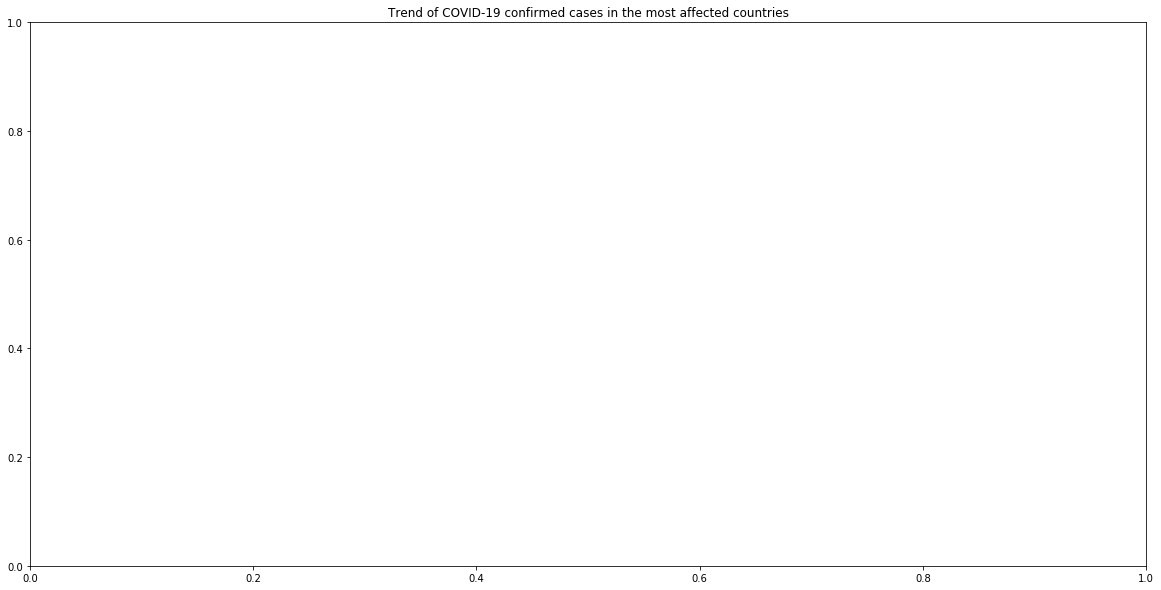

In [306]:
ax = plt.figure(figsize=(20,10))

# Add title
ax = plt.title("Trend of COVID-19 confirmed cases in the most affected countries")

# for i in top_ten:
#     ax = sns.lineplot(y = top_ten_countries['Country_Region'][i], x = top_ten_countries['Last_Update'], label = i)
ax = sns.lineplot(data = top_ten_countries)

ax.legend()



# ax = sns.color_palette("RdBu", n_colors=7)

ax.set_xticklabels(labels=top_ten_countries['Last_Update'], rotation=45, ha='right')


ax = plt.ylabel("Count")